In [1]:
import pandas as pd
rna_features = pd.read_csv('example_data/rna_pca.csv', index_col=0)
print(rna_features.head())

                        0            1           2            3           4  \
SMESG000000077 -62.876319    44.082384  -18.113277   -61.567396  181.199353   
SMESG000000089 -63.663269   -15.199367  -40.410384  -101.450487  -22.913032   
SMESG000000110 -63.390319    47.547597  -17.611772   -61.419533  -42.584065   
SMESG000000133 -60.969270    -2.419748  -33.781166   -89.273225   -8.647344   
SMESG000000190 -63.090551 -1011.193567 -186.717498  1540.997193  -36.206974   

                        5          6          7          8          9  ...  \
SMESG000000077 -15.999900 -19.529058 -59.540260  23.255595 -11.845285  ...   
SMESG000000089 -26.556231 -22.617711 -38.199732  23.258503 -11.308435  ...   
SMESG000000110 -25.725827 -22.007823 -39.874461  24.780695 -10.564157  ...   
SMESG000000133 -27.159724 -25.579712  16.584038  -1.256066 -27.735503  ...   
SMESG000000190  20.768619 -12.637890  39.336040  46.094111 -98.303505  ...   

                     640       641       642       643  

In [2]:
atac_features = pd.read_csv('example_data/atac_pca.csv', index_col=0)
print(atac_features.head())

                        0          1          2          3          4  \
SMESG000000077  31.960361  30.614153 -35.821635 -30.861094  -5.112097   
SMESG000000089 -26.976791  -5.674561  -0.589947  -0.926027   0.972028   
SMESG000000110  -6.163803  16.915488 -11.168567  -4.835767  -1.196099   
SMESG000000133 -36.979671   2.890876  -3.403738   0.388045  -3.536608   
SMESG000000190   6.179680 -10.238214  62.822164 -15.414465 -10.805676   

                       5         6         7          8          9  ...  \
SMESG000000077  1.531423  7.814927 -8.284549  -9.944130  13.320251  ...   
SMESG000000089 -0.129466  1.718050  4.274729  -0.842584  -2.535831  ...   
SMESG000000110 -2.686330  5.427834 -8.071004  -1.971598  -4.068764  ...   
SMESG000000133  3.155762  3.992549  1.051081   0.489296  -1.256100  ...   
SMESG000000190  0.452016 -3.639418 -6.506619 -11.419855  -5.394884  ...   

                    1290      1291      1292      1293      1294      1295  \
SMESG000000077  0.689774  0.2758

In [4]:
edges = pd.read_csv('example_data/edges.csv', index_col=0)
print(edges.head())

           source          target     weight
0  SMESG000013010  SMESG000014588  -3.414663
1  SMESG000013010  SMESG000079512  -2.128780
2  SMESG000013010  SMESG000002890  -0.706481
3  SMESG000013010  SMESG000003089 -28.760681
4  SMESG000013010  SMESG000005493 -10.497440


In [5]:
tf_gene_motif = pd.read_csv('example_data/tf_gene_motif.csv', index_col=0)
print(tf_gene_motif.head())

                 smesg
tfname                
AEBP2   SMESG000013010
AHR     SMESG000070743
ALX1    SMESG000030143
ALX3    SMESG000016670
ALX4    SMESG000020038


In [6]:
import grnm
grnexample = grnm.Grnm(rna_features,atac_features,edges,tf_gene_motif)

D:\software\anaconda\envs\gratude\lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
D:\software\anaconda\envs\gratude\lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
D:\software\anaconda\envs\gratude\lib\site-packages\umap\distances.py:1086: NumbaDeprecationWa

In [12]:
# Perform Principal Component Analysis (PCA) using the pca method from the grnexample module
# with d1=10, specifying the number of principal components to retain.
grnexample.pca(d1=60)
print(grnexample.PCA_a_data)

[[ 31.9603609   30.61415276 -35.82163384 ...   1.12864863  -8.22039066
   -8.50544637]
 [-26.97679142  -5.67456064  -0.5899466  ...   1.32876942  -0.308131
   -3.97716994]
 [ -6.16380295  16.91548768 -11.16856695 ...  -4.10217415   3.37907413
    2.65741364]
 ...
 [ 10.96927136  -7.7852363  -15.1604214  ...   1.38914578   3.51889789
   -4.83053939]
 [ 65.37598336 -17.32211164 -33.70909817 ...  -4.47312127  -4.43909776
   -7.73137593]
 [-32.16407442 -13.87055385  -4.52745542 ...  -1.03856712  -1.19581447
    1.38024162]]


In [13]:
#Build a graph network based on the edge relationships obtained by pando
grnexample.graph()
print(grnexample.g)

Graph(num_nodes=1828, num_edges=11204,
      ndata_schemes={'all': Scheme(shape=(120,), dtype=torch.float64), 'rna': Scheme(shape=(60,), dtype=torch.float64), 'atac': Scheme(shape=(60,), dtype=torch.float64), 'TF': Scheme(shape=(), dtype=torch.bool)}
      edata_schemes={'weight': Scheme(shape=(), dtype=torch.float64)})


In [14]:
# Invoke the Graph Autoencoder (GAE) method from the grnexample module
# with specific parameters to control the training process:
# d2=8 indicates the dimensionality of the output embeddings.
# epoch_n=100 specifies the number of training epochs to perform.
# alpha_n=0.01 sets the learning rate for the optimization process.
grnexample.gae(d2=8,epoch_n=100,alpha_n=0.01)
print(grnexample.z)

0 loss: 14918.953492392551
20 loss: 5052.315753259828
40 loss: 3172.6514629298035
60 loss: 1727.0368308264592
80 loss: 1035.5384691791267
[[-22.54947955  15.75150754 -31.46068834 ...  -2.25580963  -5.91108068
   23.79290057]
 [ -4.61984106  -3.1783573   12.99295992 ...  -2.43963198 -14.19225736
    7.32018606]
 [  0.62581907   5.74337818   8.28534517 ...  -1.4485245   -2.57008596
    6.95989656]
 ...
 [ -6.06862761  -4.45368289  14.17099809 ...  -3.39692911 -16.60593084
    7.50076406]
 [ -6.16748435  -4.1312797   13.8267477  ...  -3.66765568 -16.2104999
    7.41234485]
 [ -4.54236882  -2.58098673  12.38315855 ...  -2.22518923 -13.77374099
    7.43722723]]


In [15]:
# The parameter 'q' controls the resolution of the community detection
grnexample.louvain(q=2)
#You can get the division of the module through this method
partion = grnexample.partition
print(partion)

{0: 0, 1: 7, 2: 0, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 5, 9: 6, 10: 7, 11: 1, 12: 5, 13: 6, 14: 3, 15: 7, 16: 5, 17: 0, 18: 3, 19: 1, 20: 1, 21: 3, 22: 6, 23: 0, 24: 4, 25: 1, 26: 3, 27: 2, 28: 7, 29: 2, 30: 0, 31: 1, 32: 4, 33: 1, 34: 4, 35: 7, 36: 1, 37: 2, 38: 1, 39: 6, 40: 7, 41: 3, 42: 5, 43: 1, 44: 4, 45: 1, 46: 0, 47: 3, 48: 0, 49: 2, 50: 6, 51: 1, 52: 5, 53: 7, 54: 1, 55: 1, 56: 2, 57: 7, 58: 0, 59: 4, 60: 2, 61: 1, 62: 5, 63: 5, 64: 1, 65: 6, 66: 6, 67: 4, 68: 4, 69: 1, 70: 7, 71: 7, 72: 4, 73: 4, 74: 4, 75: 4, 76: 0, 77: 4, 78: 0, 79: 2, 80: 6, 81: 7, 82: 2, 83: 4, 84: 0, 85: 0, 86: 5, 87: 7, 88: 7, 89: 7, 90: 0, 91: 6, 92: 1, 93: 4, 94: 6, 95: 1, 96: 7, 97: 1, 98: 2, 99: 7, 100: 4, 101: 4, 102: 2, 103: 7, 104: 6, 105: 3, 106: 0, 107: 4, 108: 3, 109: 7, 110: 4, 111: 5, 112: 3, 113: 0, 114: 7, 115: 0, 116: 1, 117: 2, 118: 7, 119: 7, 120: 2, 121: 2, 122: 0, 123: 0, 124: 0, 125: 2, 126: 3, 127: 2, 128: 3, 129: 4, 130: 3, 131: 2, 132: 5, 133: 2, 134: 4, 135: 4, 136: 6, 137: 3, 138: 

In [16]:
grnexample.umap()
print(grnexample.umap_data)

[[-0.9504317  1.7585509]
 [ 6.321108  11.708565 ]
 [ 9.248479   8.413259 ]
 ...
 [ 4.36541   10.314205 ]
 [ 4.3789763 10.36581  ]
 [ 7.5533013 11.352824 ]]


In [45]:
import pickle
with open('example_data/cell_marker.pkl', 'rb') as file:
    # 从文件中加载序列化的对象
    marker_gene = pickle.load(file)

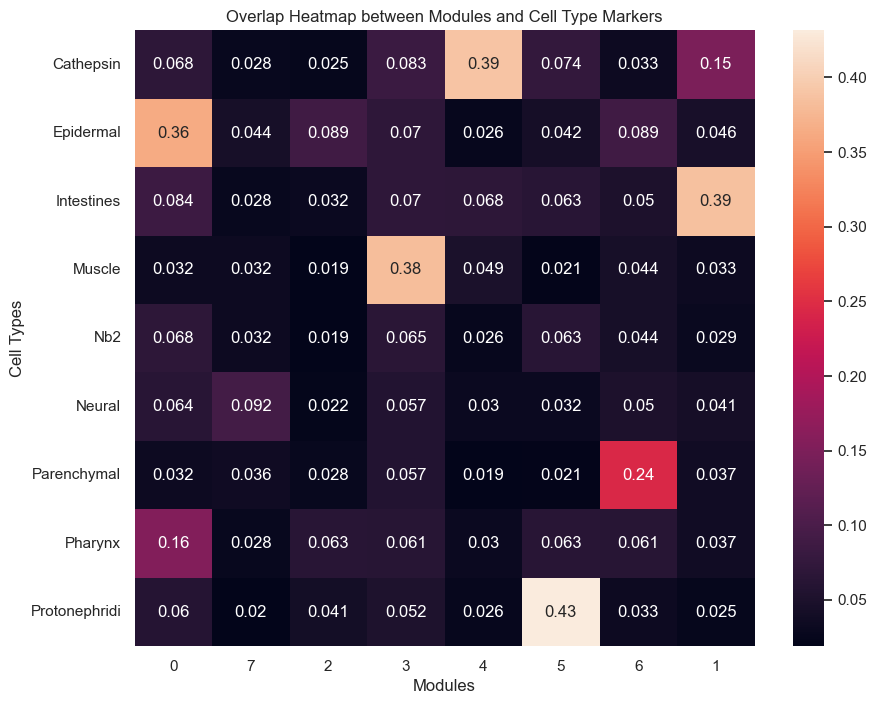

In [26]:
grnexample.match_heat(celltypes_marker=marker_gene)

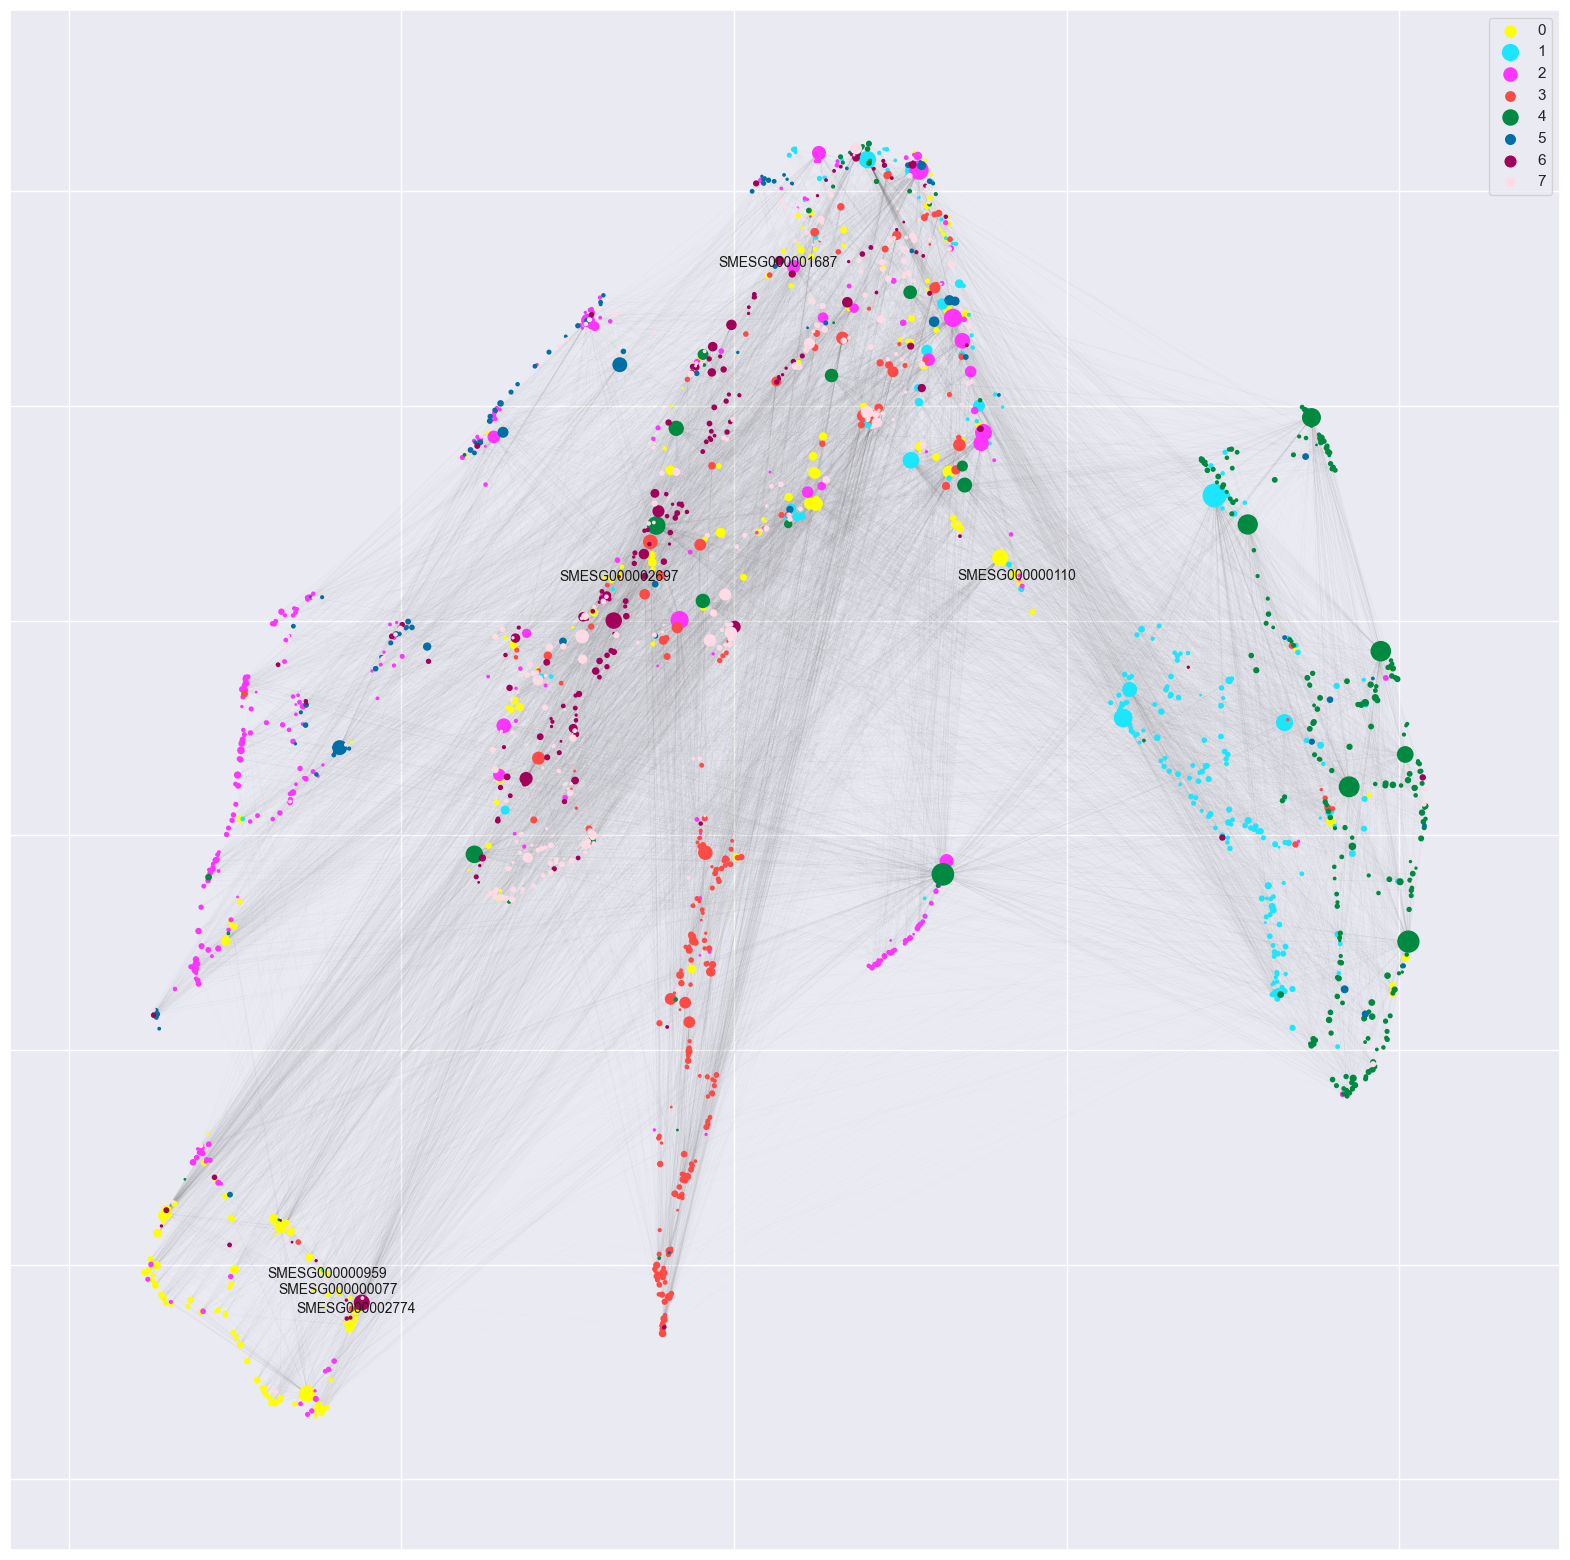

In [27]:
grnexample.grn_plot('y',['SMESG000000077', 'SMESG000000110', 'SMESG000000959', 'SMESG000001687', 'SMESG000002697', 'SMESG000002774'])

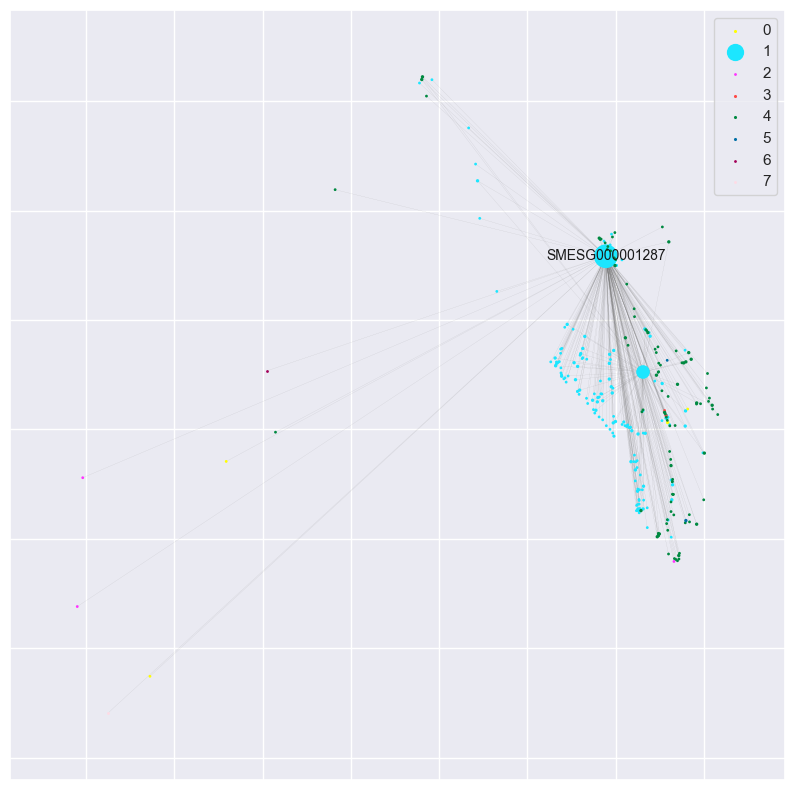

{0: 0.01532567049808429, 1: 0.5823754789272031, 2: 0.011494252873563218, 3: 0.007662835249042145, 4: 0.367816091954023, 5: 0.007662835249042145, 6: 0.0038314176245210726, 7: 0.0038314176245210726}


In [29]:
grnexample.single_grn_plot('SMESG000001287','y',['SMESG000001287','SMESG000000077', 'SMESG000000110', 'SMESG000000959', 'SMESG000001202', 'SMESG000001687', 'SMESG000002697', 'SMESG000002774', 'SMESG000002907'])

In [55]:
tf_list = tf_gene_motif['smesg']
tf_list_ = []
for i in tf_list:
    if i in grnexample.gene_idx.keys():
        tf_list_.append(i)

tf_module = [grnexample.partition[grnexample.gene_idx[i]] for i in tf_list_]


In [ ]:
grnexample.tf_target_scatterplot(tf_list=tf_list_,tf_module=tf_module)